# Decisionc Tree Algorithm

For the given ‘Iris’ dataset, create the Decision Tree classifier and visualize it graphically. The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

In [1]:
#importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#loading the dataset
df=pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [4]:
x=df.iloc[:,1:5].values
y=df.iloc[:,-1].values
print(x.shape,y.shape)

(150, 4) (150,)


In [5]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
df.shape

(150, 6)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# lets check the correlation of the given features of data

In [9]:
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


In [10]:
#changing the target value from categorical to numerical
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()     
label=encoder.fit_transform(df["Species"])

In [11]:
df=df.drop("Species", axis='columns')
df=df.drop("Id", axis='columns')

In [12]:
#appending the transformed column
df['species']=label
df.species.unique()

array([0, 1, 2])

# Decision Tree Algorithm

In [13]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier( random_state = 0)
classifier.fit(x, y)
print('decision tree created')

decision tree created


In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [16]:
#training the decision tree classification model on traing set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [17]:
#predicting the test results
y_pred=classifier.predict(x_test)

In [18]:
#comparing the predictions with actual data and predicted result
pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
pred.head()

,Actual,Predicted
0,Iris-virginica,Iris-virginica
1,Iris-versicolor,Iris-versicolor
2,Iris-setosa,Iris-setosa
3,Iris-virginica,Iris-virginica
4,Iris-setosa,Iris-setosa


# Metric Evaluation

defining a confusion matrix

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


# Classification report

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38



# Model Accuracy

In [21]:
from sklearn import metrics
print("The accuracy of the Decision Tree is","{:.2f}".format(metrics.accuracy_score(y_pred,y_test)))

The accuracy of the Decision Tree is 0.97


In [22]:
Feature_names=list(df.columns[1:])
Feature_names

['SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'species']

# Visualising the Decision tree

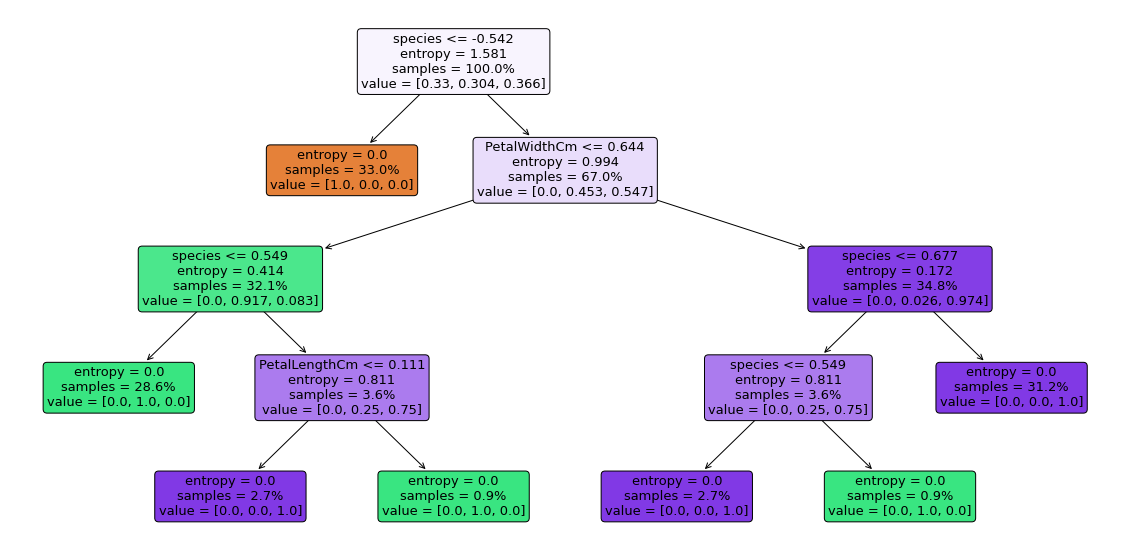

In [23]:
from sklearn import tree
Tree = plt.figure(figsize =(20,10))
Tree = tree.plot_tree(classifier, feature_names = Feature_names,fontsize = 13, filled = 'True',proportion = True, rounded = 10)
plt.show()